In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as ss



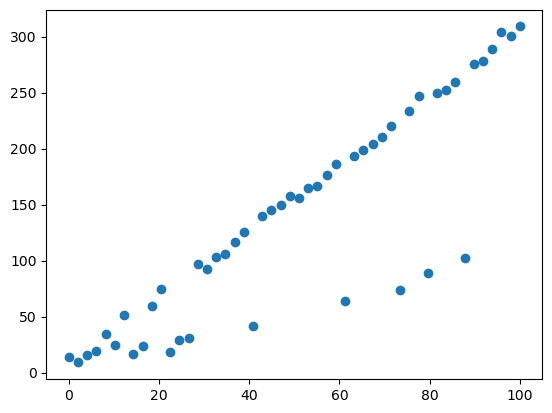

In [325]:
np.random.seed(1)
n_dimensions = 2
noise = np.random.normal( 1, 5, 50).T
x = np.linspace(0 , 100, 50).T
"add a random noise curve to reudce the RMSE , add a random unifomr distribution for 30% of points"
idx_n = np.random.randint(0, len(x) + 1, size=10)
y = 3*x  + 5 + noise
y[idx_n] = x[idx_n]  + 5 + noise[idx_n]
y = y.T
plt.scatter(x,y)
'init uniform distribution over all the set'
prior = (np.ones(len(x)) * 0.5).T
vec = np.vstack((x,y)).T

In [307]:
"select a random subset of the data"
idx = np.random.randint(0, len(x), size=n_dimensions)
model = ss.linregress(vec[idx][:,0] , vec[idx][:,1])

print(model)
# plt.scatter(x,y)
# plt.plot(x, model.intercept + model.slope*x)
# plt.show()
y_hat = (model.intercept + model.slope*x)
'find residuals'
residuals = y - y_hat
'calculate parameters'
mu = np.mean(residuals)
std = np.std(residuals)

'compute the baesian update of the vectors , set the prior as the observation for recursion'
p = ss.norm(mu , std).pdf(residuals)
prior = (p * prior) / np.sum((p * prior))

'resample the value of x being used accordig to the update distribution'
sampling_idx =  np.random.choice(vec[:,0] , len(x) ,  p  = prior)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
LinregressResult(slope=3.3764294098183694, intercept=-31.755026073309352, rvalue=0.9999999999999998, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


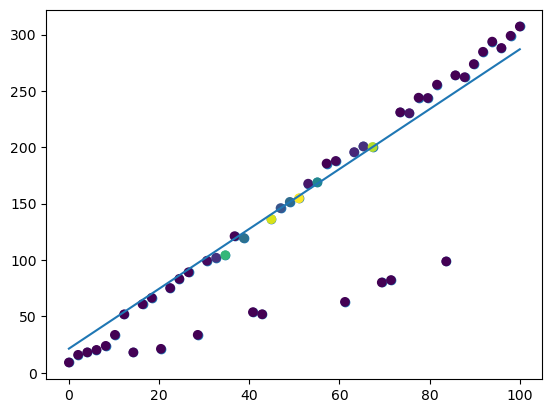

21.332068046398263 2.656189164103861


In [335]:


# np.random.seed(1)
n_dimensions = 2
noise = np.random.normal( 1, 5, 50).T
x = np.linspace(0 , 100, 50).T
"add a random noise curve to reudce the RMSE , add a random unifomr distribution for 30% of points"
idx_n = np.random.randint(0, len(x), size=10)
y = 3*x  + 5 + noise
y[idx_n] = x[idx_n]  + 5 + noise[idx_n]
y = y.T
plt.scatter(x,y)
'init uniform distribution over all the set'
prior = (np.ones(len(x)) * 0.5).T
vec = np.vstack((x,y)).T

iters = 50
prior = np.ones(len(x)).T * 0.5
sampling_idx =  np.random.choice(len(x), 2,  p  = prior/np.sum(prior) , replace=False)

for i in range(iters) :
    model = ss.linregress(x[sampling_idx] , y[sampling_idx])
    y_hat = (model.intercept + model.slope*x)
    'find residuals'
    residuals = y - y_hat
    'calculate parameters'
    mu = np.mean(residuals)
    std = np.std(residuals)
    'baesian updating'
    p = ss.norm(mu , std).pdf(residuals)
    prior = (p * prior) / np.sum((p * prior))
    sampling_idx =  np.random.choice(len(x) , 2 ,  p  = prior , replace=False)

plt.scatter(x,y, c=prior, cmap='viridis')
plt.plot(x, model.intercept + model.slope*x)
plt.show()
print(model.intercept , model.slope)


In [604]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Set random seed for reproducibility
np.random.seed(1)

n_dimensions = 2
x = np.linspace(0, 100, 200)  # Removed .T
noise = np.random.normal(0, 10, len(x))  # Removed .T

idx_n = np.random.randint(30, len(x), size=int(0.3 * len(x)))
print(len(idx_n))
y = 3*x + 5 + noise
y[idx_n] = x[idx_n]  + noise[idx_n]

print(len(y))
print(len(y[idx_n]))
# Removed .T as it's unnecessary for 1D arrays

60
200
60


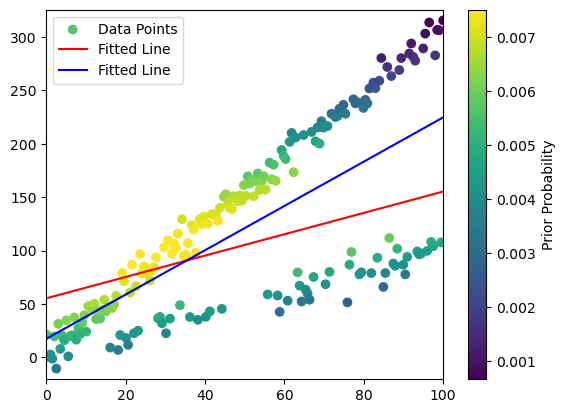

Intercept: 55.33579135038243 Slope: 0.999095905826757


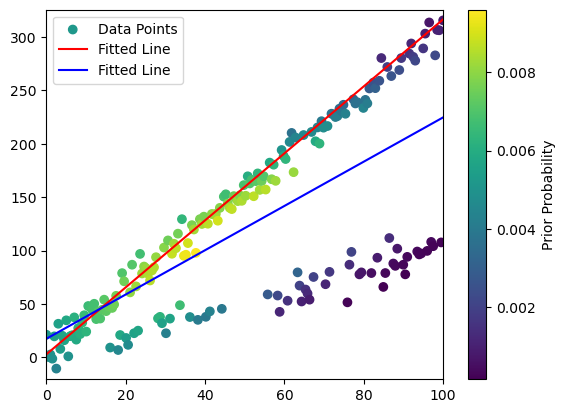

Intercept: 2.8569952638793232 Slope: 3.1353530767738254


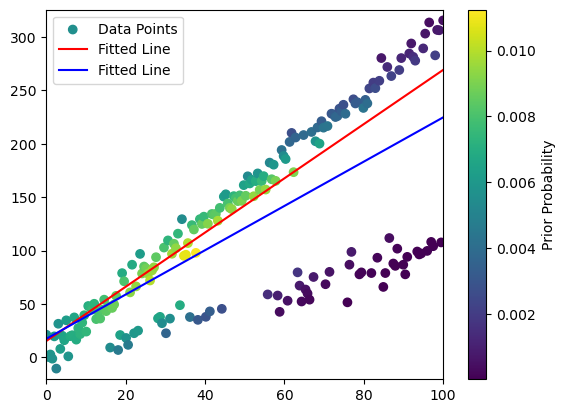

Intercept: 15.395492190132394 Slope: 2.536820030886396


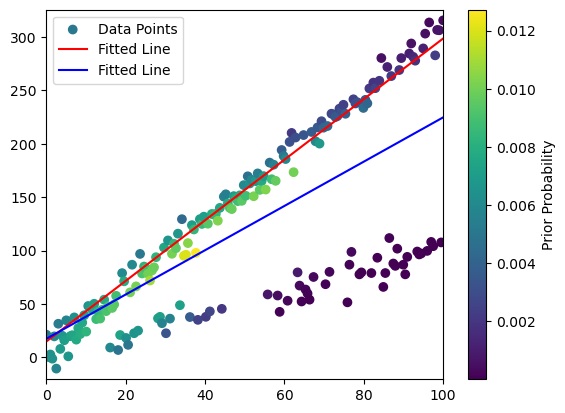

Intercept: 14.902785941419191 Slope: 2.8358235998265617


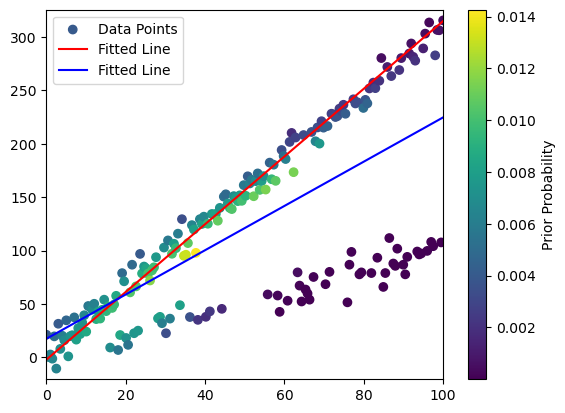

Intercept: -2.1486940615461427 Slope: 3.169945544222839


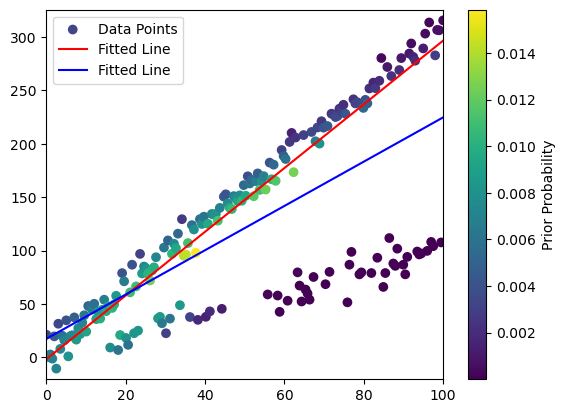

Intercept: -1.6670240209301341 Slope: 2.981688997304596


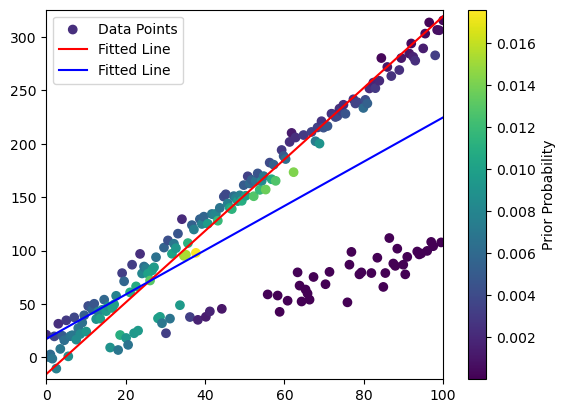

Intercept: -15.592219908752487 Slope: 3.349039743095134


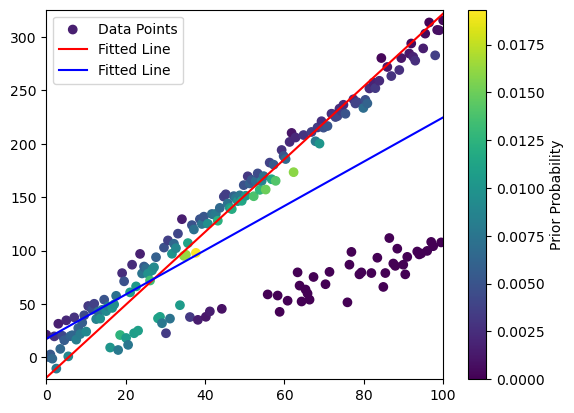

Intercept: -18.91345223674958 Slope: 3.4073803290439733


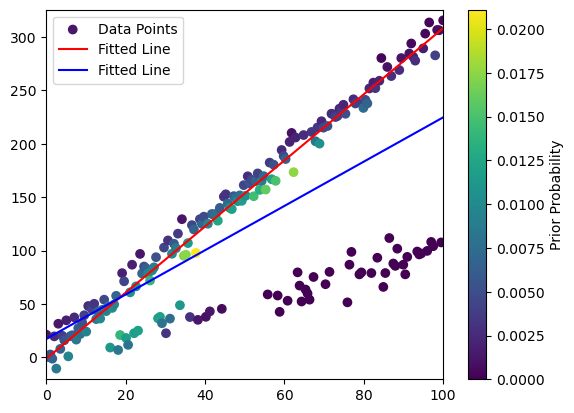

Intercept: -1.1869733997863543 Slope: 3.092872110645664


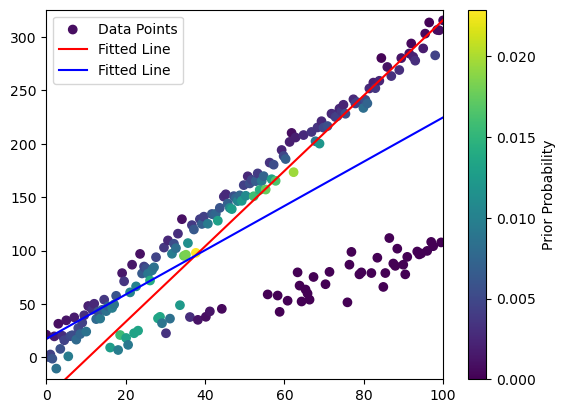

Intercept: -37.328743078740104 Slope: 3.531089631554939


In [605]:
prior = np.ones(len(x)) * 0.5  # Removed .T

for i in range(10):
    sampling_idx = np.random.choice(len(x), 10, p=prior/np.sum(prior), replace=False)
    model_params = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
    slope, intercept = model_params
    y_hat = intercept + slope * x
    residuals = y - y_hat
    
    mu = np.mean(residuals)
    std = np.std(residuals)

    p = ss.norm(mu, std).pdf(residuals)
    prior = (p * prior) / np.sum(p * prior)


    # Final plot to visualize the end result
    plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
    plt.plot(x, intercept + slope * x, color='red', label='Fitted Line')
    slope_m , intercept_m  = np.polyfit(x, y, 1)
    plt.plot(x, intercept_m + slope_m * x, color='blue', label='Fitted Line')

    plt.xlim([min(x), max(x)])
    plt.ylim([min(y) - 10, max(y) + 10])  # Adjust the padding as necessary

    plt.colorbar(label='Prior Probability')
    plt.legend()
    plt.show()

    print("Intercept:", intercept, "Slope:", slope)


In [614]:
def WANSAC(x , y , n_iter = 10):
    prior = np.ones(len(x)) * 0.5  # Removed .T
    for i in range(10):
        sampling_idx = np.random.choice(len(x), 10, p=prior/np.sum(prior), replace=False)
        model_params = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
        slope, intercept = model_params
        y_hat = intercept + slope * x
        residuals = y - y_hat
        
        mu = np.mean(residuals)
        std = np.std(residuals)

        p = ss.norm(mu, std).pdf(residuals)
        prior = (p * prior) / np.sum(p * prior)
        
    return slope, intercept

# Final plot to visualize the end result
plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
plt.plot(x, intercept + slope * x, color='red', label='Fitted Line')
slope_m , intercept_m  = np.polyfit(x, y, 1)
plt.plot(x, intercept_m + slope_m * x, color='blue', label='Fitted Line')

plt.xlim([min(x), max(x)])
plt.ylim([min(y) - 10, max(y) + 10])  # Adjust the padding as necessary

plt.colorbar(label='Prior Probability')
plt.legend()
plt.show()

print("Intercept:", intercept, "Slope:", slope)


SyntaxError: expected ':' (647541889.py, line 1)

In [612]:
from copy import copy
import numpy as np
from numpy.random import default_rng
rng = default_rng()


class RANSAC:
    def __init__(self, n=10, k=100, t=0.05, d=10, model=None, loss=None, metric=None):
        self.n = n              # `n`: Minimum number of data points to estimate parameters
        self.k = k              # `k`: Maximum iterations allowed
        self.t = t              # `t`: Threshold value to determine if points are fit well
        self.d = d              # `d`: Number of close data points required to assert model fits well
        self.model = model      # `model`: class implementing `fit` and `predict`
        self.loss = loss        # `loss`: function of `y_true` and `y_pred` that returns a vector
        self.metric = metric    # `metric`: function of `y_true` and `y_pred` and returns a float
        self.best_fit = None
        self.best_error = np.inf

    def fit(self, X, y):
        for _ in range(self.k):
            ids = rng.permutation(X.shape[0])

            maybe_inliers = ids[: self.n]
            maybe_model = copy(self.model).fit(X[maybe_inliers], y[maybe_inliers])

            thresholded = (
                self.loss(y[ids][self.n :], maybe_model.predict(X[ids][self.n :]))
                < self.t
            )

            inlier_ids = ids[self.n :][np.flatnonzero(thresholded).flatten()]

            if inlier_ids.size > self.d:
                inlier_points = np.hstack([maybe_inliers, inlier_ids])
                better_model = copy(self.model).fit(X[inlier_points], y[inlier_points])

                this_error = self.metric(
                    y[inlier_points], better_model.predict(X[inlier_points])
                )

                if this_error < self.best_error:
                    self.best_error = this_error
                    self.best_fit = better_model

        return self

    def predict(self, X):
        return self.best_fit.predict(X)

def square_error_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2


def mean_square_error(y_true, y_pred):
    return np.sum(square_error_loss(y_true, y_pred)) / y_true.shape[0]


class LinearRegressor:
    def __init__(self):
        self.params = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        r, _ = X.shape
        X = np.hstack([np.ones((r, 1)), X])
        self.params = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X: np.ndarray):
        r, _ = X.shape
        X = np.hstack([np.ones((r, 1)), X])
        return X @ self.params


x = np.array([-0.848,-0.800,-0.704,-0.632,-0.488,-0.472,-0.368,-0.336,-0.280,-0.200,-0.00800,-0.0840,0.0240,0.100,0.124,0.148,0.232,0.236,0.324,0.356,0.368,0.440,0.512,0.548,0.660,0.640,0.712,0.752,0.776,0.880,0.920,0.944,-0.108,-0.168,-0.720,-0.784,-0.224,-0.604,-0.740,-0.0440,0.388,-0.0200,0.752,0.416,-0.0800,-0.348,0.988,0.776,0.680,0.880,-0.816,-0.424,-0.932,0.272,-0.556,-0.568,-0.600,-0.716,-0.796,-0.880,-0.972,-0.916,0.816,0.892,0.956,0.980,0.988,0.992,0.00400]).reshape(-1,1)
y = np.array([-0.917,-0.833,-0.801,-0.665,-0.605,-0.545,-0.509,-0.433,-0.397,-0.281,-0.205,-0.169,-0.0531,-0.0651,0.0349,0.0829,0.0589,0.175,0.179,0.191,0.259,0.287,0.359,0.395,0.483,0.539,0.543,0.603,0.667,0.679,0.751,0.803,-0.265,-0.341,0.111,-0.113,0.547,0.791,0.551,0.347,0.975,0.943,-0.249,-0.769,-0.625,-0.861,-0.749,-0.945,-0.493,0.163,-0.469,0.0669,0.891,0.623,-0.609,-0.677,-0.721,-0.745,-0.885,-0.897,-0.969,-0.949,0.707,0.783,0.859,0.979,0.811,0.891,-0.137]).reshape(-1,1)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/qn/v9q6ncwn2777_bdp5t0ydpdr0000gn/T/ipykernel_60407/2651788677.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


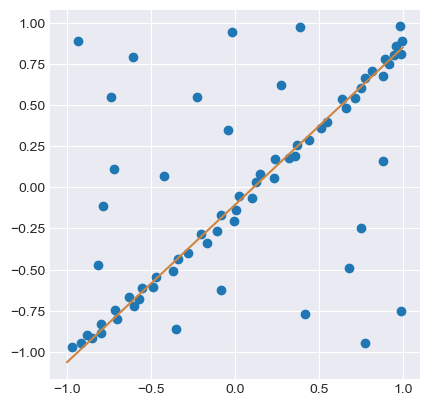

In [613]:
regressor = RANSAC(model=LinearRegressor(), loss=square_error_loss, metric=mean_square_error)
regressor.fit(x, y)
plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

plt.scatter(x, y)

line = np.linspace(-1, 1, num=100).reshape(-1, 1)
plt.plot(line, regressor.predict(line), c="peru")
plt.show()

